In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
pd.set_option('display.max_columns', None)
%matplotlib inline
from IPython.display import display, HTML

import importlib.util
#spec = importlib.util.spec_from_file_location("miptlabs", "/full/path/to/miptlabs.py")
#miptlabs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(miptlabs)
#ml = miptlabs

import miptlabs as ml
importlib.reload(ml)

import sys, importlib
importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)

sp.Basic.__str__=lambda expr, **settings:ml.PQStrPrinter(settings).doprint(expr)

sp.__version__

'1.1.2.dev'

In [31]:
data = pd.read_csv('lab1.2 table.csv')
display(data)
df = pd.DataFrame()
df['L'] = data.apply(lambda row: ml.PQ(row['L']*u.cm, sigma=0.1*u.cm), axis=1)
df['B'] = data.apply(lambda row: ml.PQ(row['B']*1e-3*u.tesla, sigma=0.01*1e-3*u.tesla), axis=1)
L = ml.PQ(4*u.cm, sigma=0.1*u.cm)
df['I'] = data[~data['I'].isnull()].apply(lambda row: ml.PQ(row['I']*u.amperes, sigma=0.1*u.amperes), axis=1)
df['B2'] = data[~data['B2'].isnull()].apply(lambda row: ml.PQ(row['B2']*1e-3*u.tesla, sigma=0.01*1e-3*u.tesla), axis=1)

df['B2_diap'] = data[~data['B2_diap'].isnull()].apply(lambda row: ml.PQ(row['B2_diap']*1e-3*u.tesla, sigma=0.0000000001), axis=1)

,L,B,I,B2,B2_diap,n
0,1.000000e-08,7.84,0.5,8.25,20.0,NaN
1,5.000000e-01,7.94,1.0,15.84,20.0,NaN
2,1.000000e+00,8.04,1.5,23.20,200.0,NaN
3,1.500000e+00,8.10,2.0,30.40,200.0,NaN
4,2.000000e+00,8.16,2.5,38.10,200.0,NaN
5,2.500000e+00,8.19,NaN,NaN,NaN,NaN
6,3.000000e+00,8.22,NaN,NaN,NaN,NaN
7,3.500000e+00,8.24,NaN,NaN,NaN,NaN
8,4.000000e+00,8.25,NaN,NaN,NaN,NaN
9,4.500000e+00,8.24,NaN,NaN,NaN,NaN


In [32]:
df

TypeError: can't convert expression to float

TypeError: can't convert expression to float

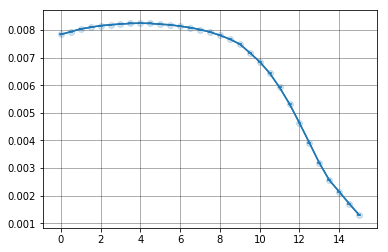

In [25]:
ml.plt_pq(df['L'], df['B'])

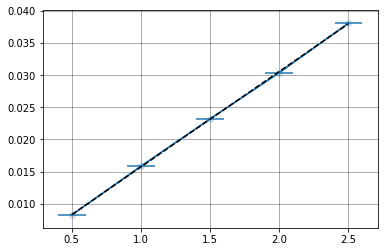

In [26]:
ml.plt_pq(df['I'].dropna(), df['B2'].dropna(), ols=True)